<a href="https://colab.research.google.com/github/faruk17035/Deep-Learning-Models/blob/main/Classification%2BLSTM%2011-10-21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
import pandas as pd
from pandas import read_excel
file = '/content/gdrive/MyDrive/Glove3decimal.csv' 
#df = pd.read_csv(file)
tweet = pd.read_csv(file)
print(tweet)

       tpc0   tpc1   tpc2   tpc3   tpc4  ...  tpc508  tpc509  tpc510  tpc511  Target
0     0.000 -0.026  0.057  0.045  0.080  ...   0.039  -0.051   0.123  -0.076       0
1    -0.052  0.003  0.055  0.073  0.071  ...   0.022  -0.056   0.113  -0.035       1
2    -0.037 -0.040  0.074  0.029  0.067  ...   0.054  -0.056   0.150  -0.063       0
3    -0.007 -0.032  0.035  0.056  0.087  ...   0.028  -0.069   0.123  -0.058       0
4     0.035 -0.039  0.076  0.013  0.086  ...   0.079  -0.051   0.137  -0.084       1
...     ...    ...    ...    ...    ...  ...     ...     ...     ...     ...     ...
2099 -0.024 -0.039  0.045  0.050  0.088  ...   0.045  -0.048   0.133  -0.077       1
2100 -0.040 -0.016  0.046  0.063  0.076  ...   0.003  -0.050   0.129  -0.050       1
2101 -0.021 -0.021  0.060  0.042  0.067  ...   0.038  -0.061   0.119  -0.055       1
2102 -0.012 -0.020  0.055  0.040  0.078  ...   0.041  -0.063   0.153  -0.069       1
2103 -0.048 -0.025  0.039  0.047  0.085  ...   0.034  -0.051   0.

In [20]:
features = np.array(df.columns[:-1])
target = 'Target'

X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [21]:
X_train.shape, X_test.shape

((1683, 512), (421, 512))

In [22]:
from collections import defaultdict
from collections import  Counter
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

Text(0, 0.5, 'tweets')

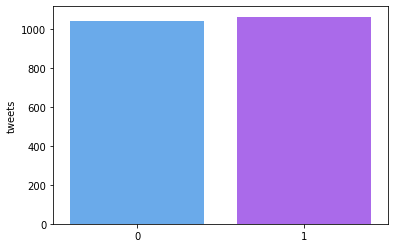

In [13]:
## Not run
#Checking the class distribution
x = tweet.Target.value_counts()
sns.barplot(x.index, x, palette='cool')
plt.gca().set_ylabel('tweets')

In [25]:
length_long_sentence = 512

In [26]:
def BLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=X_train.shape[0], 
                        output_dim=X_train.shape[1], 
                        weights = [X_train], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [27]:
model = BLSTM()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = [X_test, y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
53/53 [==============================] - 307s 6s/step - loss: 0.7250 - accuracy: 0.5122 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.00000, saving model to model.h5
Epoch 2/7
53/53 [==============================] - 301s 6s/step - loss: 0.7334 - accuracy: 0.4955 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/7
53/53 [==============================] - 292s 6s/step - loss: 0.7241 - accuracy: 0.4819 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/7
53/53 [==============================] - 294s 6s/step - loss: 0.7119 - accuracy: 0.5134 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/7
53/53 [==============================] - 291s 6s/step - loss: 0.7154 - accuracy: 0.4920 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

Epoch 00005: val_loss did